<a href="https://colab.research.google.com/github/ljs7463/study-repository/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%97%B0%EC%8A%B5(beginner)/Data%20analysis%20practice/pandas_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

## 데이터프레임 로드

In [10]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')

In [11]:
df

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488
...,...,...,...,...,...
3288,경남,60㎡초과 85㎡이하,2020,2,3065
3289,경남,85㎡초과 102㎡이하,2020,2,3247
3290,제주,60㎡이하,2020,2,4039
3291,제주,60㎡초과 85㎡이하,2020,2,3962


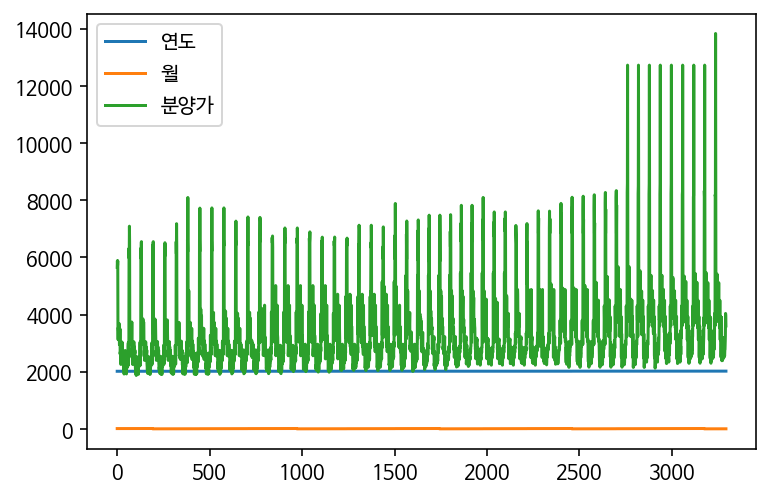

In [12]:
df.plot()

## 한글 폰트가 깨지는 현상 해결 방법입니다.

### STEP 1. 아래 코드를 실행합니다.

In [13]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

### STEP 2. 상단 메뉴 - 런타임 - 런타임 다시 시작을 클릭

### STEP 3. 아래 코드를 한 번 더 실행 합니다.

In [14]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

### STEP 4. 필요한 패키지, 데이터 로딩

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')

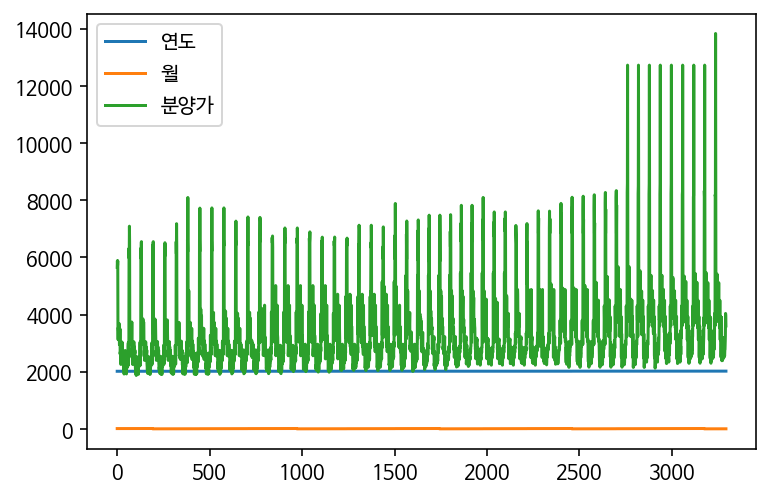

In [17]:
df.plot()

### STEP 5. Graph 사이즈 키우는 옵션

In [18]:
plt.rcParams["figure.figsize"] = (12, 9)

## 1. Plot 그래프

plot은 일반 선그래프를 나타냅니다.

In [19]:
df = pd.read_csv('https://bit.ly/ds-house-price-clean')

kind 옵션을 통해 원하는 그래프를 그릴 수 있습니다.

kind 옵션:
* line: 선 그래프
* bar: 바 그래프
* barh: 수평 바 그래프
* hist: 히스토그램
* kde: 커널 밀도 그래프
* hexbin: 고밀도 산점도 그래프
* box: 박스 플롯
* area: 면적 그래프
* pie: 파이 그래프
* scatter: 산점도 그래프


데이터의 성격에 맞는 그래프 형식이 있습니다. 앞으로 차근차근 살펴보도록 하겠습니다.

## line 그래프

* line 그래프는 데이터가 연속적인 경우 사용하기 적절합니다. (예를 들면, 주가 데이터)

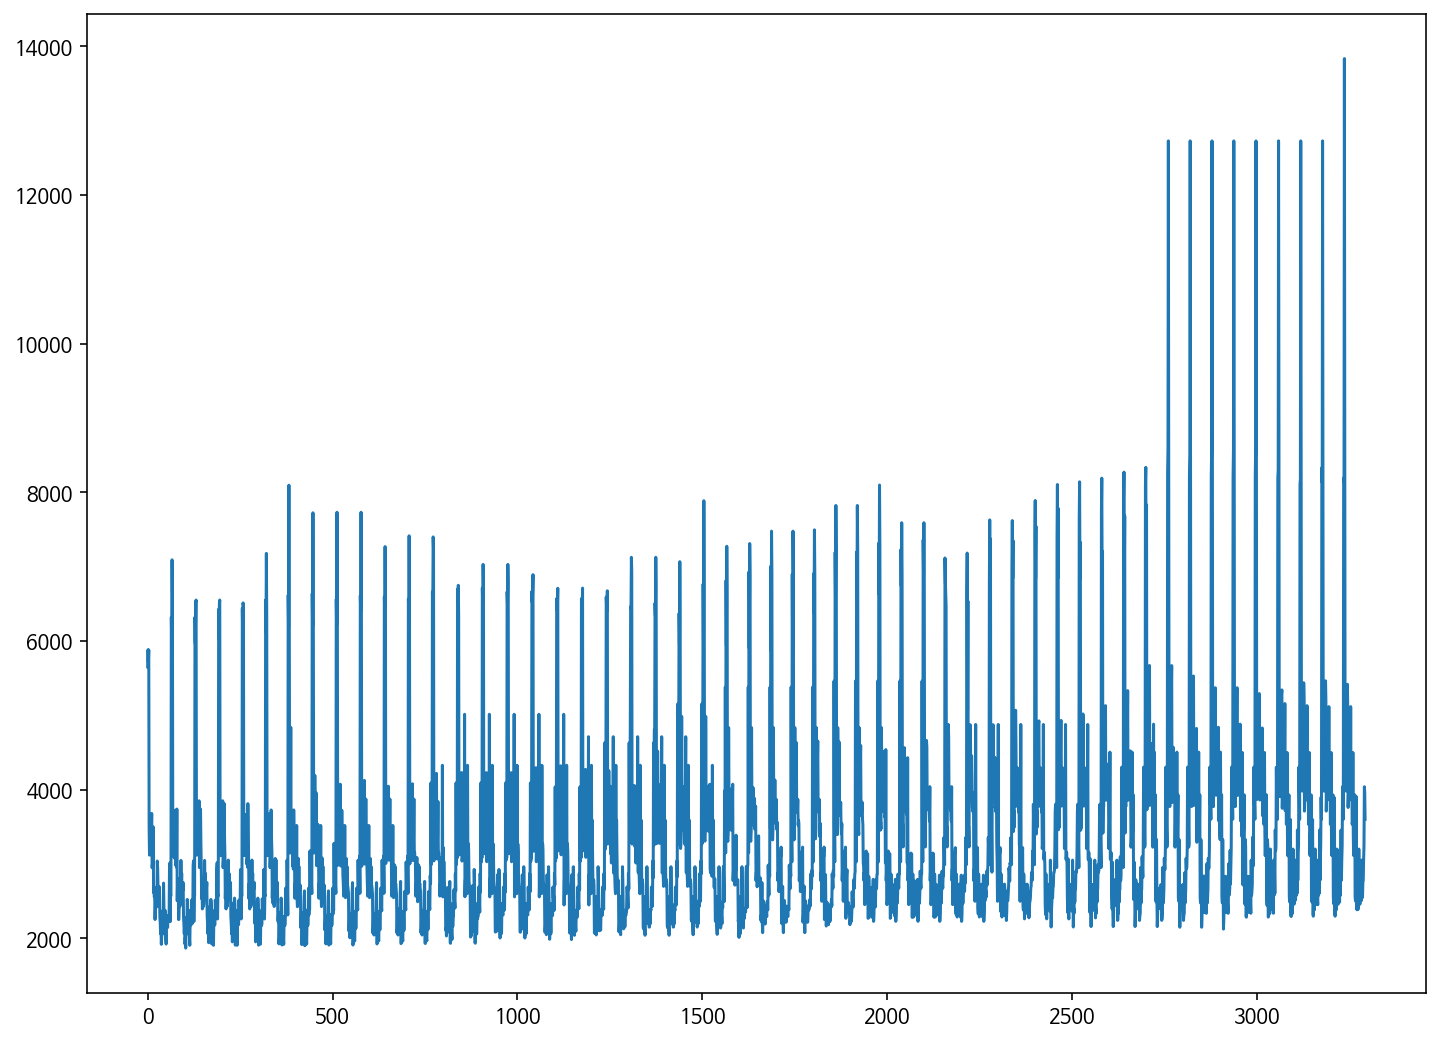

In [20]:
df['분양가'].plot(kind = 'line')

In [21]:
df_seoul = df.loc[df['지역'] == '서울']

In [22]:
df_seoul

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
64,서울,60㎡이하,2015,11,6320
...,...,...,...,...,...
3178,서울,102㎡초과,2020,1,8779
3234,서울,60㎡이하,2020,2,8193
3235,서울,60㎡초과 85㎡이하,2020,2,8140
3236,서울,85㎡초과 102㎡이하,2020,2,13835


In [23]:
df_seoul_year = df_seoul.groupby('연도').mean()

In [24]:
df_seoul_year

,월,분양가
연도,,
2015,11.0,6201.000000
2016,6.5,6674.520833
2017,6.5,6658.729167
2018,6.5,7054.687500
2019,6.5,8735.083333
2020,1.5,9647.375000


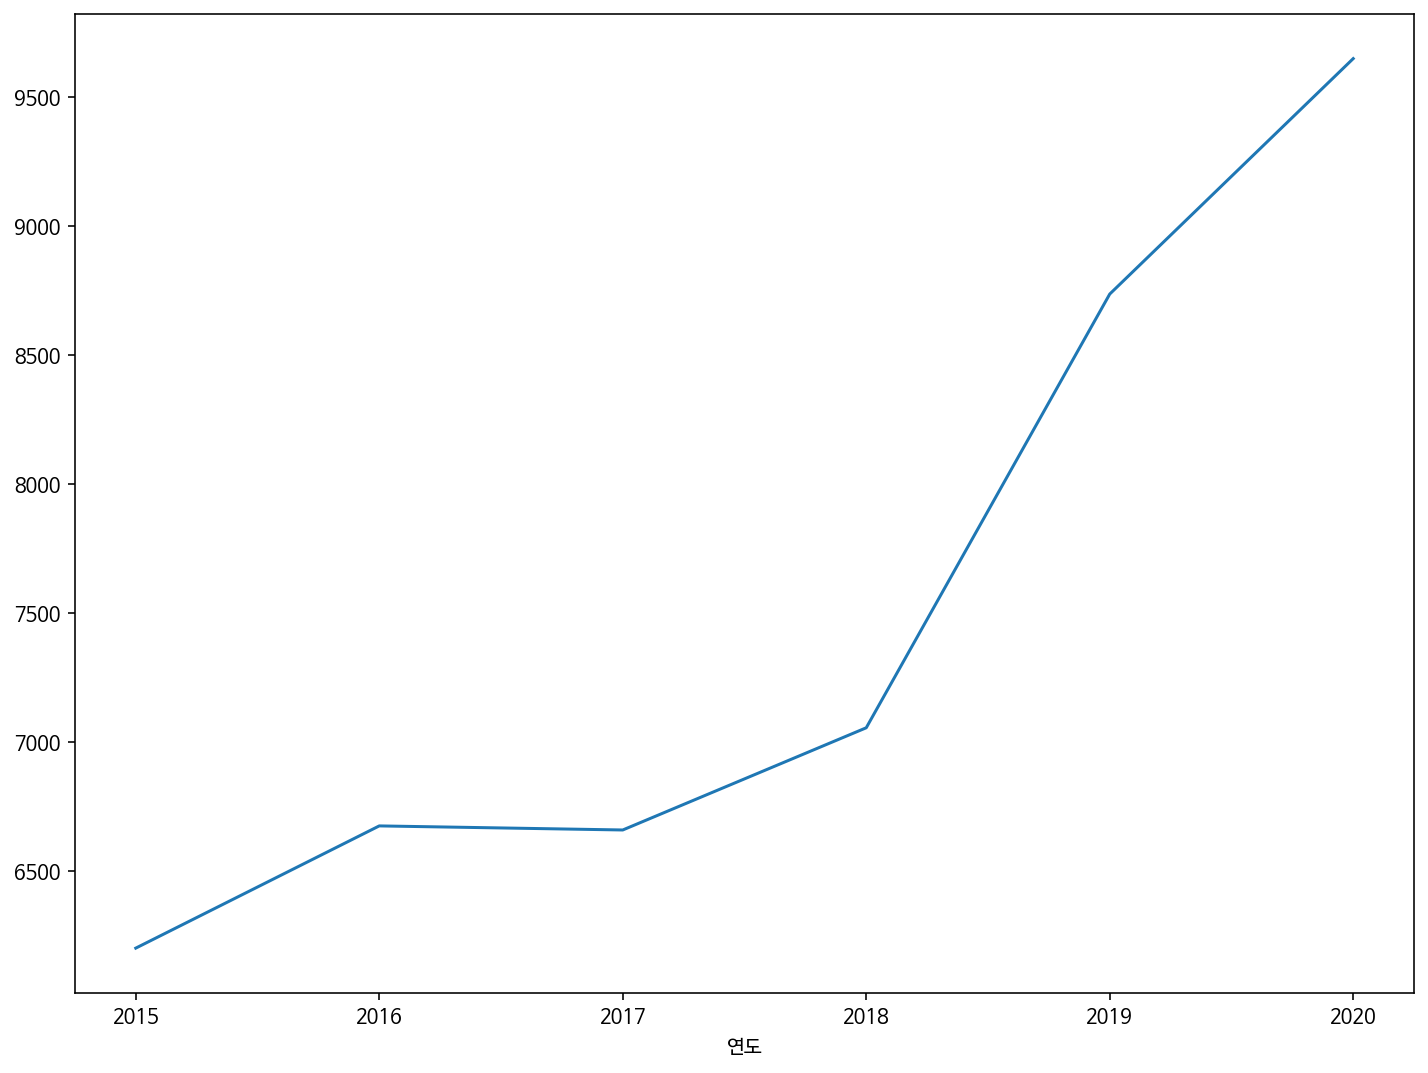

In [25]:
df_seoul_year['분양가'].plot(kind = 'line') # 연도별로 서울의 분양가격이 올라가고 있다는 인사이트를 얻을 수 있다.

## bar 그래프

bar 그래프는 그룹별로 비교할 때 유용합니다.

In [26]:
df.groupby('지역')['분양가'].mean()

지역
강원    2448.156863
경기    4133.952830
경남    2858.932367
경북    2570.465000
광주    3055.043750
대구    3679.620690
대전    3176.127389
부산    3691.981132
서울    7308.943396
세종    2983.543147
울산    2990.373913
인천    3684.302885
전남    2326.250000
전북    2381.416268
제주    3472.677966
충남    2534.950000
충북    2348.183962
Name: 분양가, dtype: float64

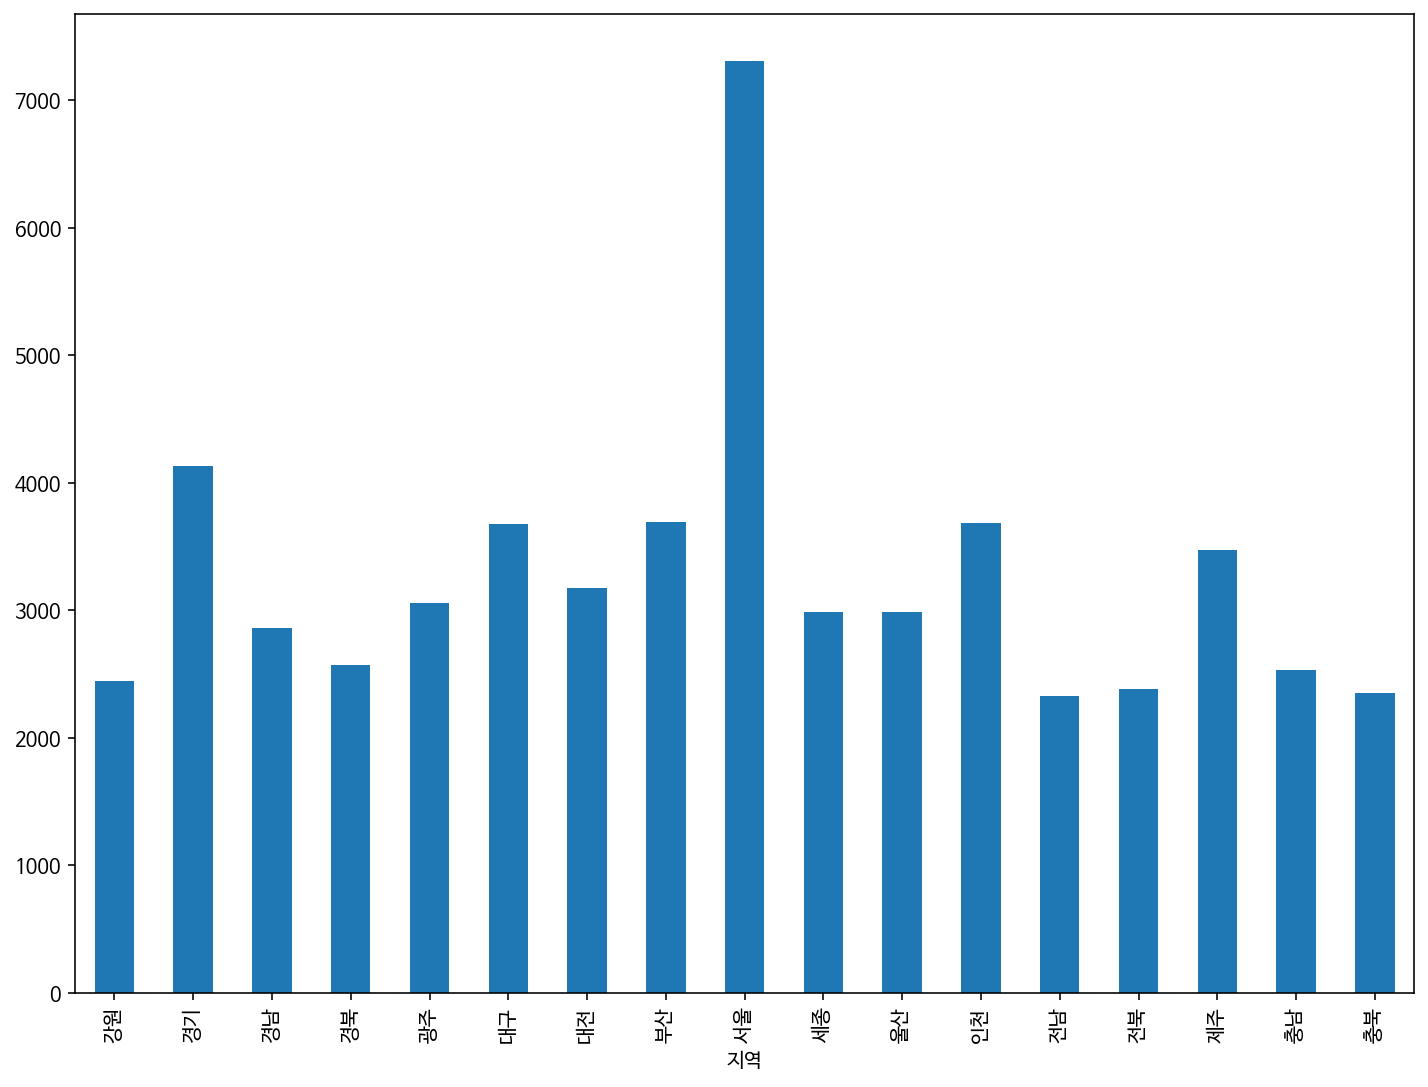

In [27]:
df.groupby('지역')['분양가'].mean().plot(kind = 'bar')


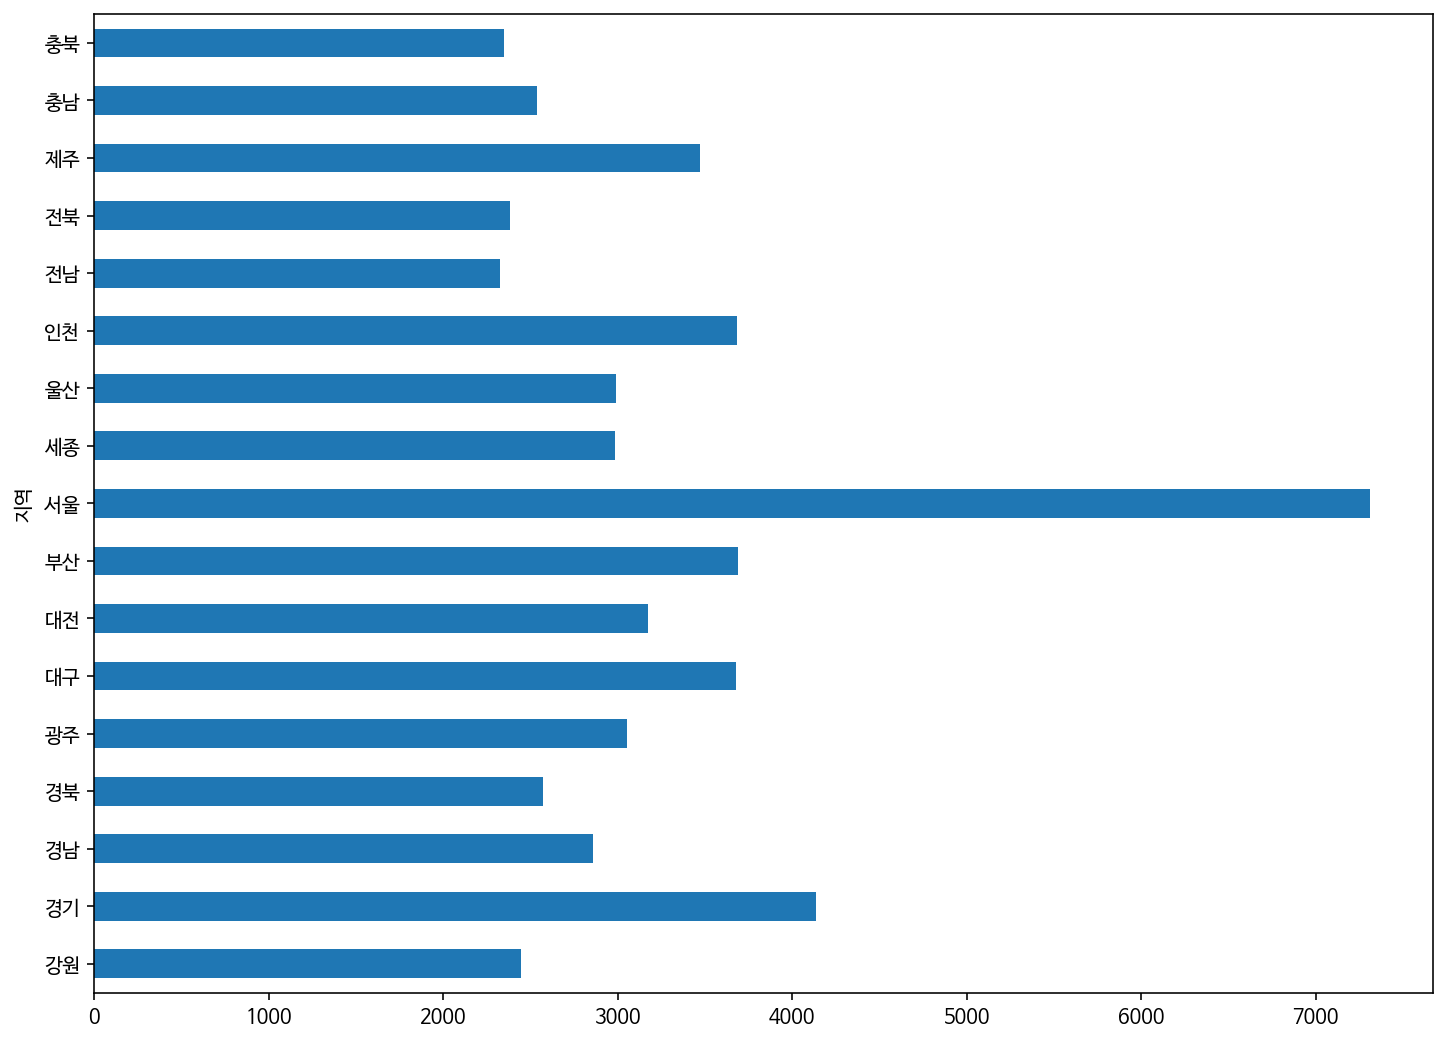

In [ ]:
df.groupby('지역')['분양가'].mean().plot(kind = 'barh')


## 히스토그램 (hist)

히스토그램은 **분포-빈도 를 시각화**하여 보여줍니다






가로축에는 분포를, 세로축에는 빈도가 시각화되어 보여집니다.

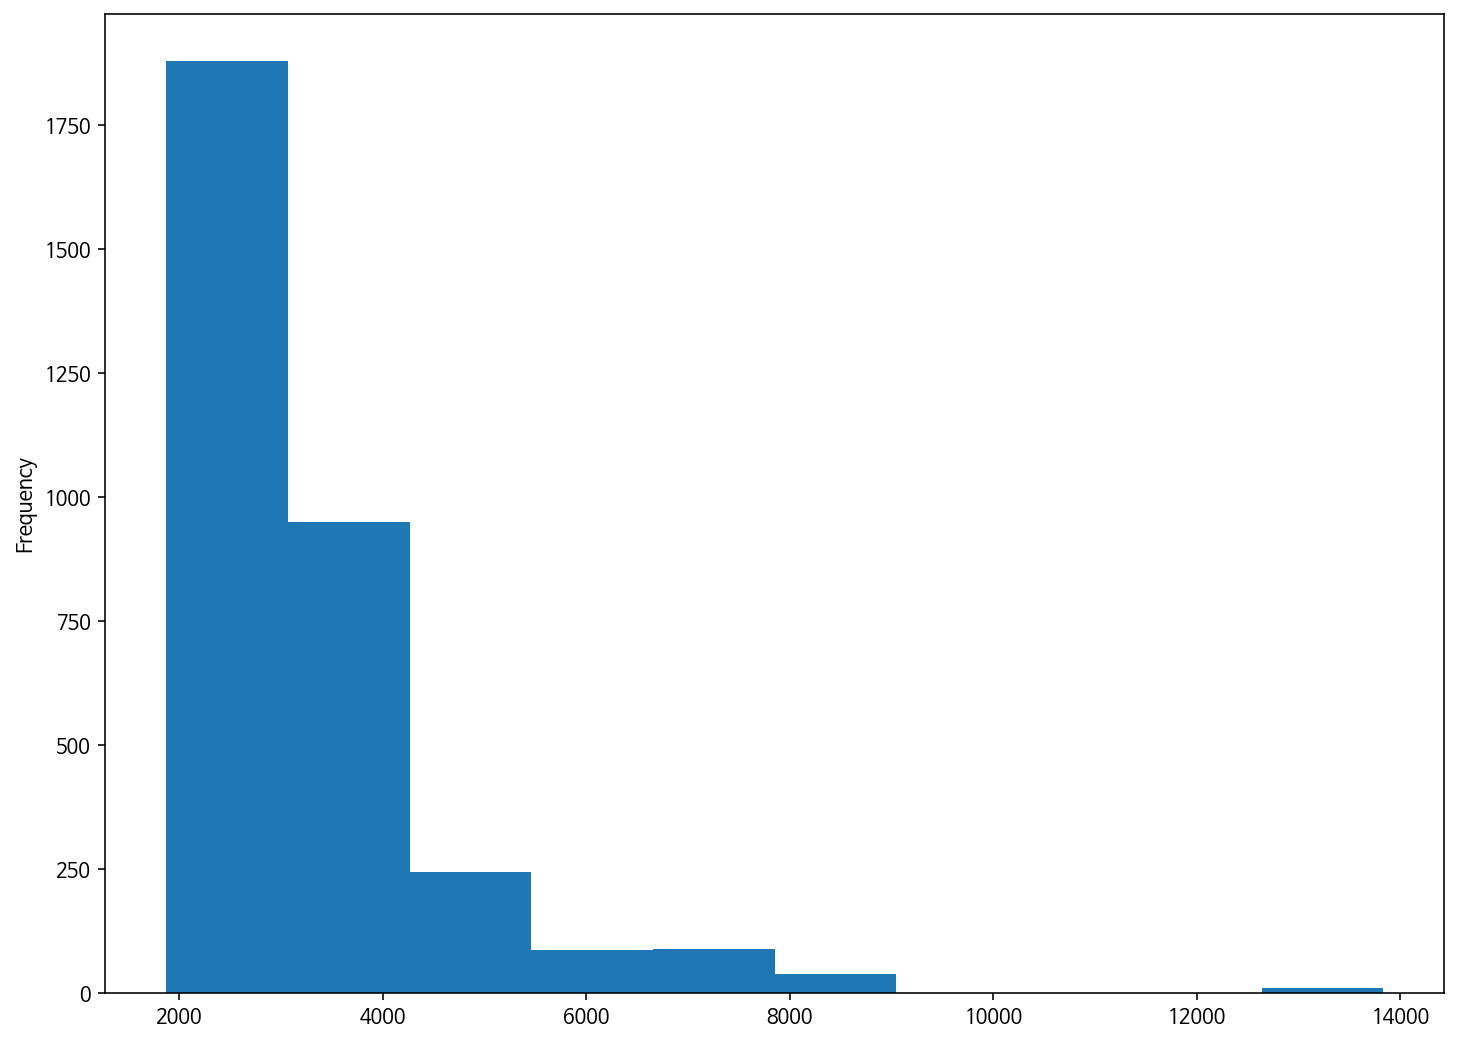

In [ ]:
df['분양가'].plot(kind = 'hist')

## 커널 밀도 그래프

* 히스토그램과 유사하게 밀도를 보여주는 그래프입니다.
* 히스토그램과 유사한 모양새를 갖추고 있습니다. 
* 부드러운 라인을 가지고 있습니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


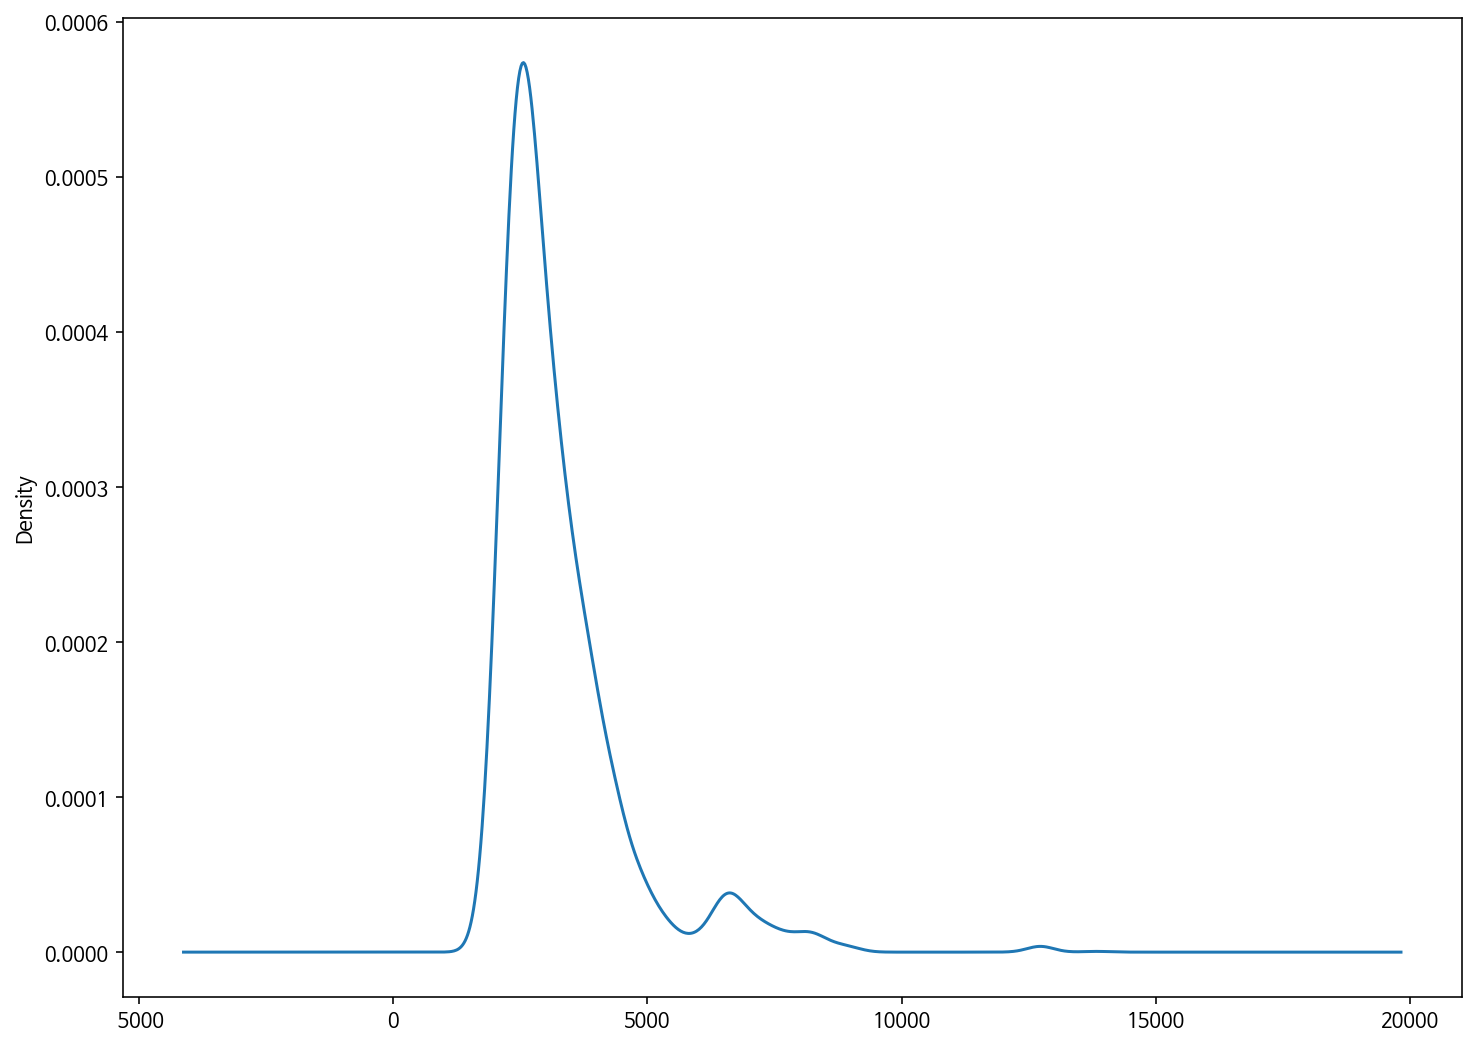

In [ ]:
df['분양가'].plot(kind = 'kde')


## Hexbin

* hexbin은 고밀도 산점도 그래프입니다.
* x와 y 키 값을 넣어 주어야 합니다.
* x, y 값 모두 numeric 한 값을 넣어 주어야합니다.
* 데이터의 밀도를 추정합니다.

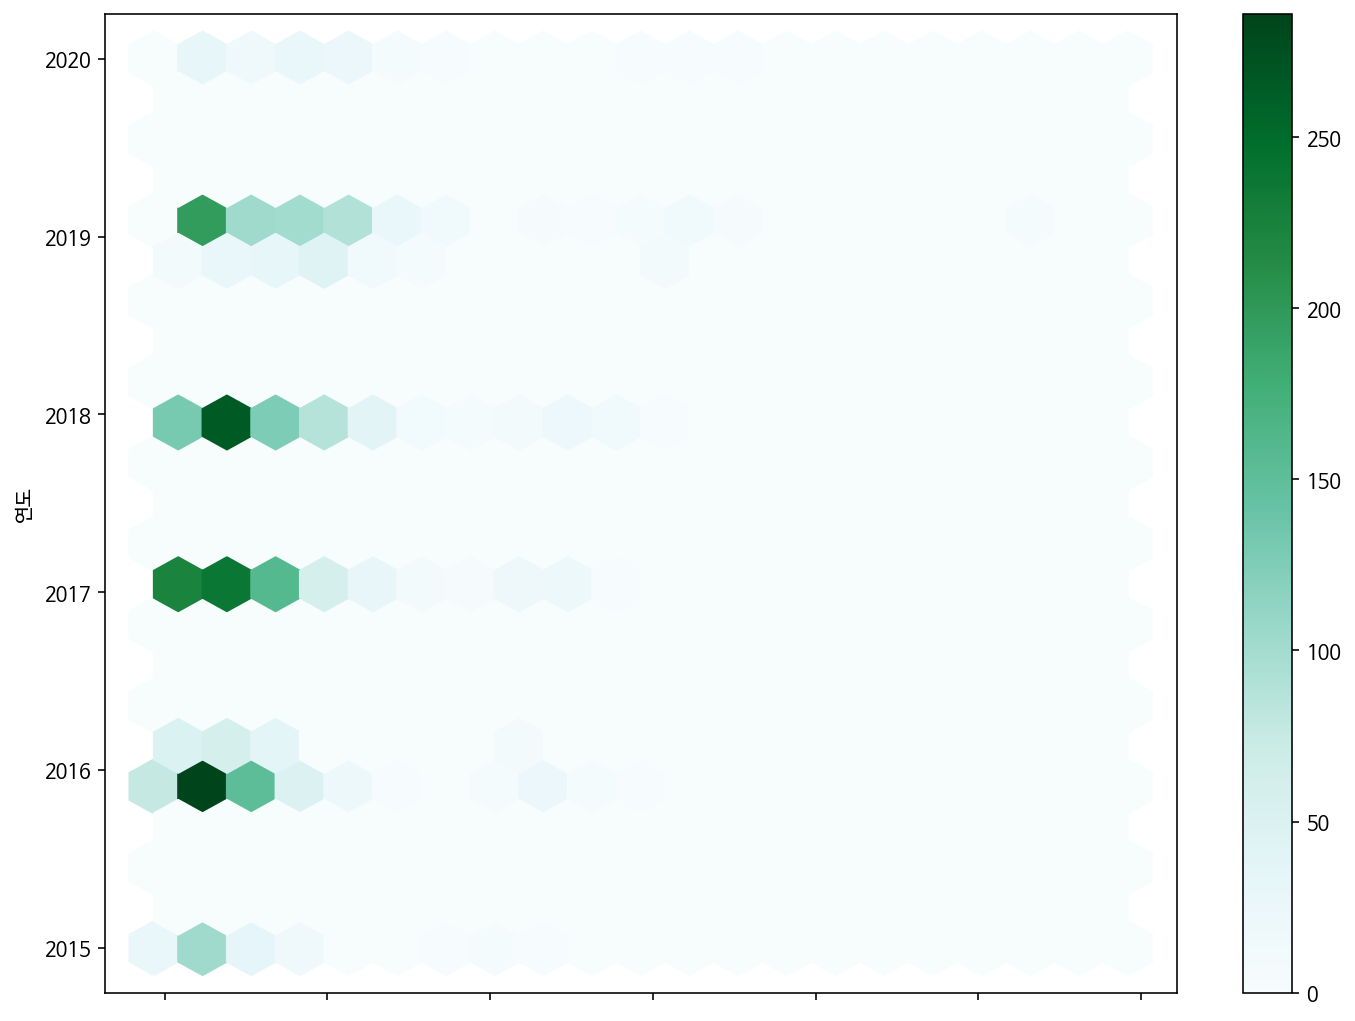

In [29]:
df.plot(kind= 'hexbin', x= '분양가', y = '연도', gridsize =20)

## 박스 플롯(box)

박스 플롯을 사용하는 이유는 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인할 수 있는 목적으로 사용한다. 또한 통계적으로 이상치(outlier)가 있는지도 확인이 가능하다.

In [30]:
df_seoul = df.loc[df['지역'] == '서울']

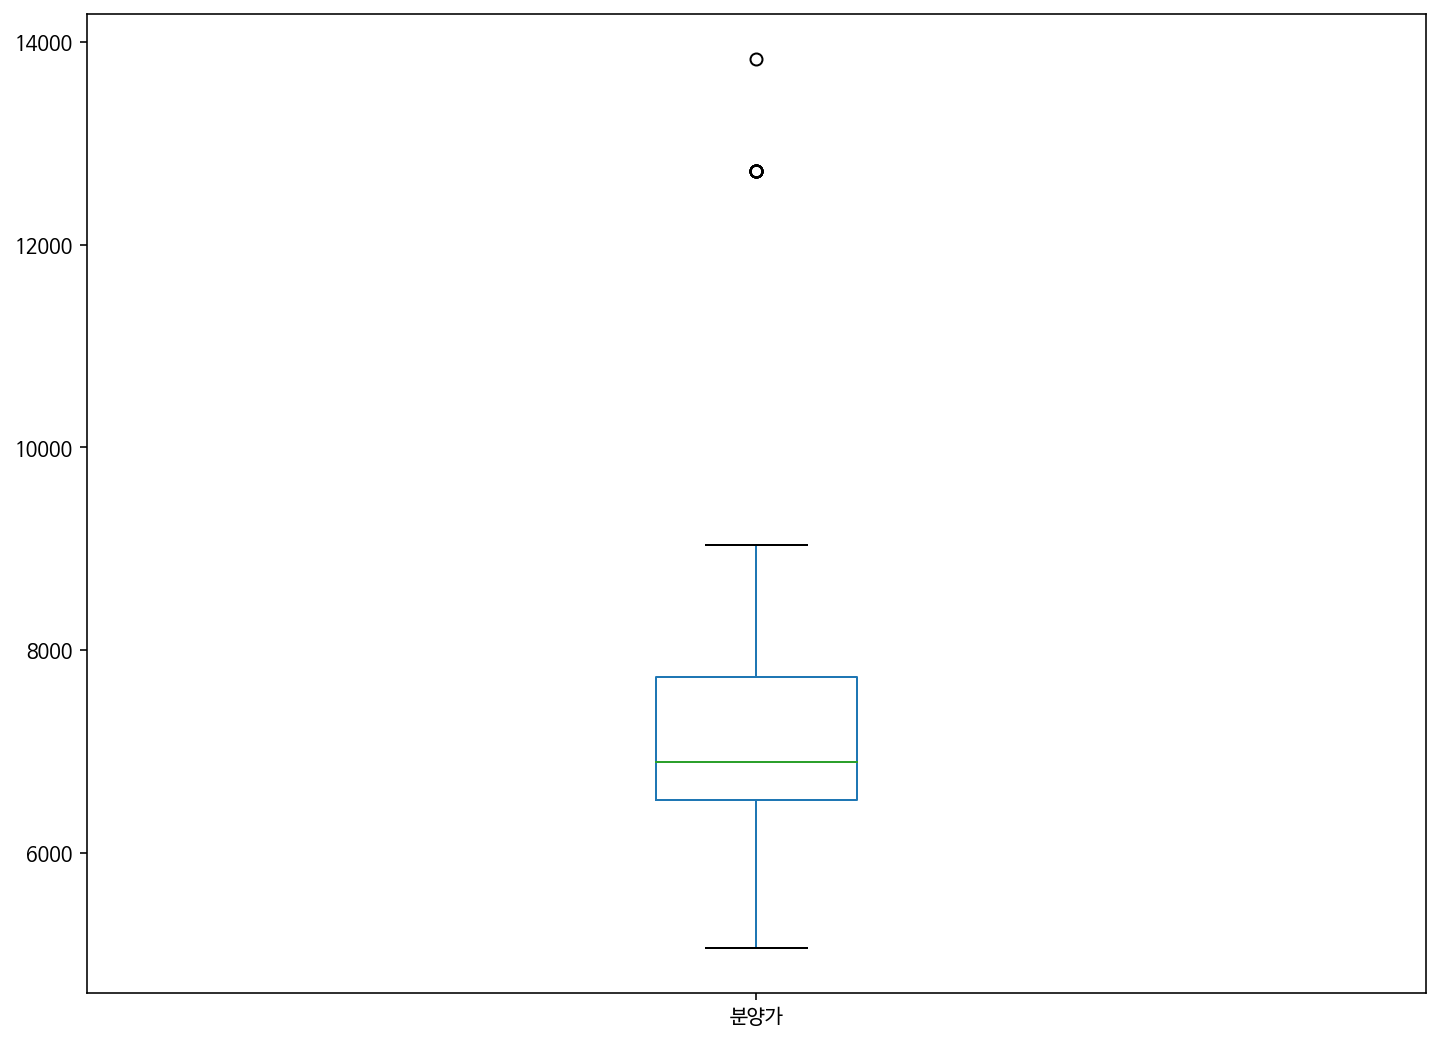

In [31]:
df_seoul['분양가'].plot(kind = 'box')

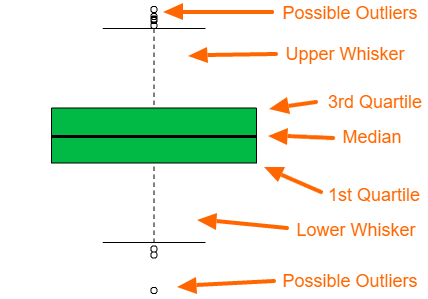

In [ ]:
from IPython.display import Image

# image source : https://justinsighting.com/how-to-interpret-box-plots/
Image('https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png')

In [32]:
df_seoul.describe()

,연도,월,분양가
count,212.00000,212.000000,212.000000
mean,2017.45283,6.566038,7308.943396
std,1.31439,3.603629,1402.869496
min,2015.00000,1.000000,5061.000000
25%,2016.00000,3.000000,6519.750000
50%,2017.00000,7.000000,6895.500000
75%,2019.00000,10.000000,7732.000000
max,2020.00000,12.000000,13835.000000


IQR은 Inter Quantile Range의 약어로써, (3Q - 1Q) 값입니다.

 3Q = 75프로 값 (써드쿼터) , 1Q= 25프로 값(원 쿼터)

In [33]:
IQR = (7732 - 6519.75) 
IQR

1212.25

In [34]:
## 박스 플롯 max 
7732 + IQR*1.5

9550.375

In [35]:
## 박스 플롯 min
6519.75 - IQR * 1.5

4701.375

박스플롯은 데이터 outlier 감지 할 떄 가장 많이 활용 되며, 25%, median, 75% 분위의 값을 활용하는 용도로 많이 활용됩니다.

실제데이터의 최소 최대값을 구한게 아니라 IQR을 통해서 구한것이고 이를 넘어가는건 실제데이터 값을 outlier라고 통칭한다.

이것이 중요한것은 가끔 오류인데이터나 극단적으로 측정되어 값이 튀는것을 볼 수 있는데 이런거를 참고하기 위함.

어떤 데이터 전처리하는데 outlier가 엄청많이 생겼을때 뭔가 이상한데 다른쪽으로 접근해야겠다 라고 생각할 수 있다.

## area plot

* area plot은 line 그래프에서 아래 area를 모두 색칠해 주는 것이 특징입니다.

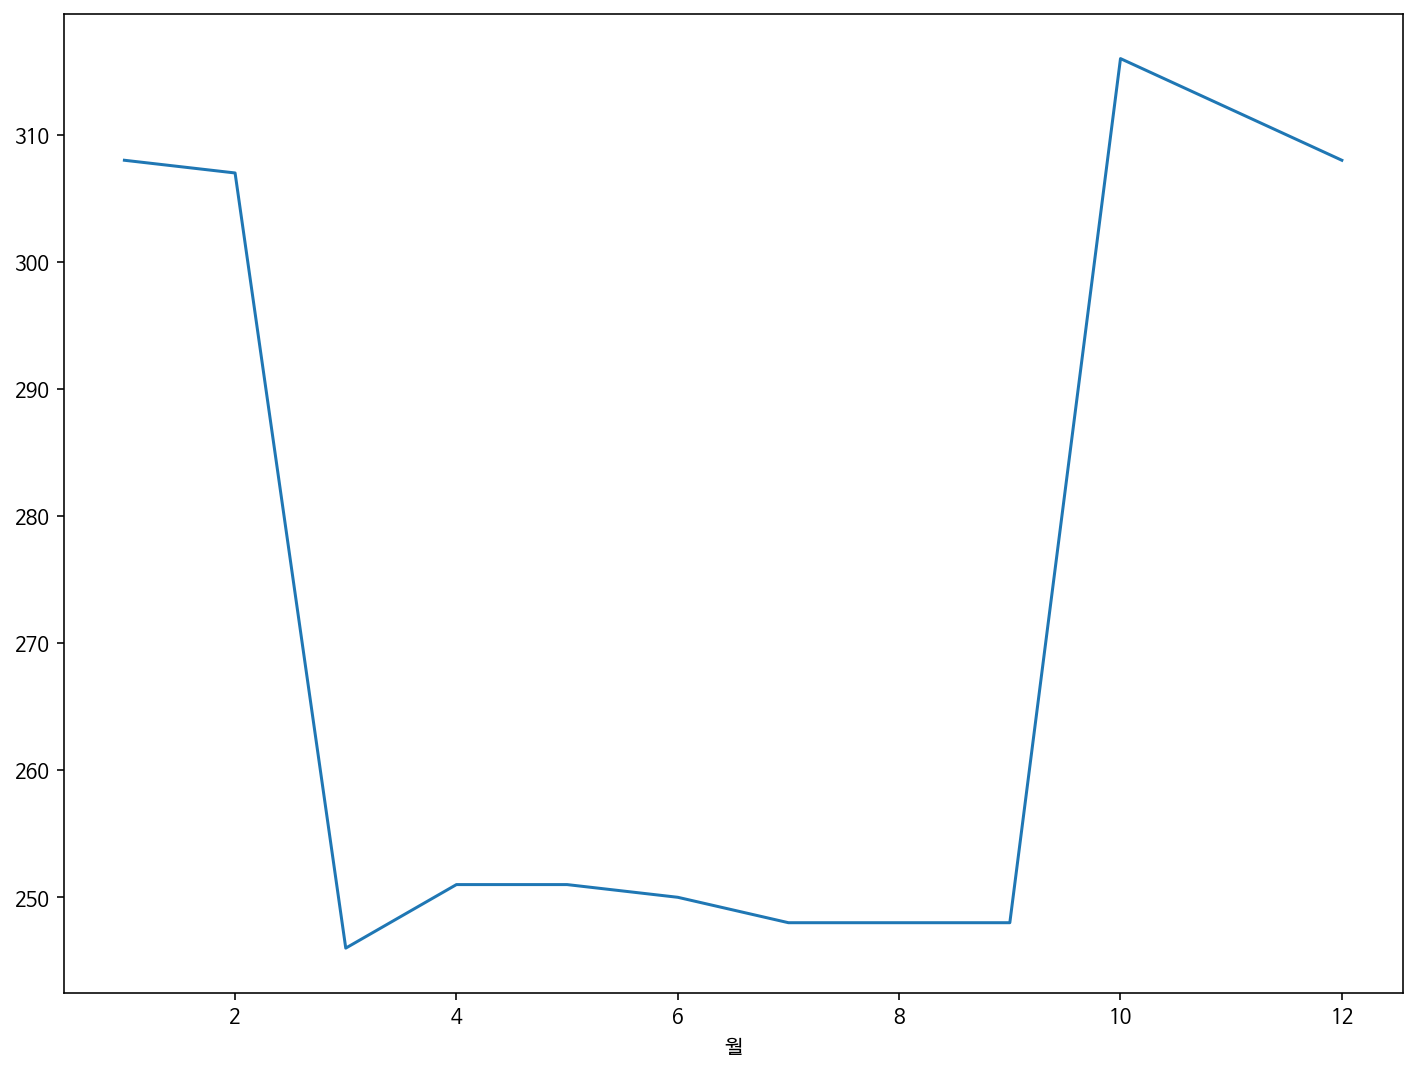

In [37]:
df.groupby('월')['분양가'].count().plot(kind = 'line')

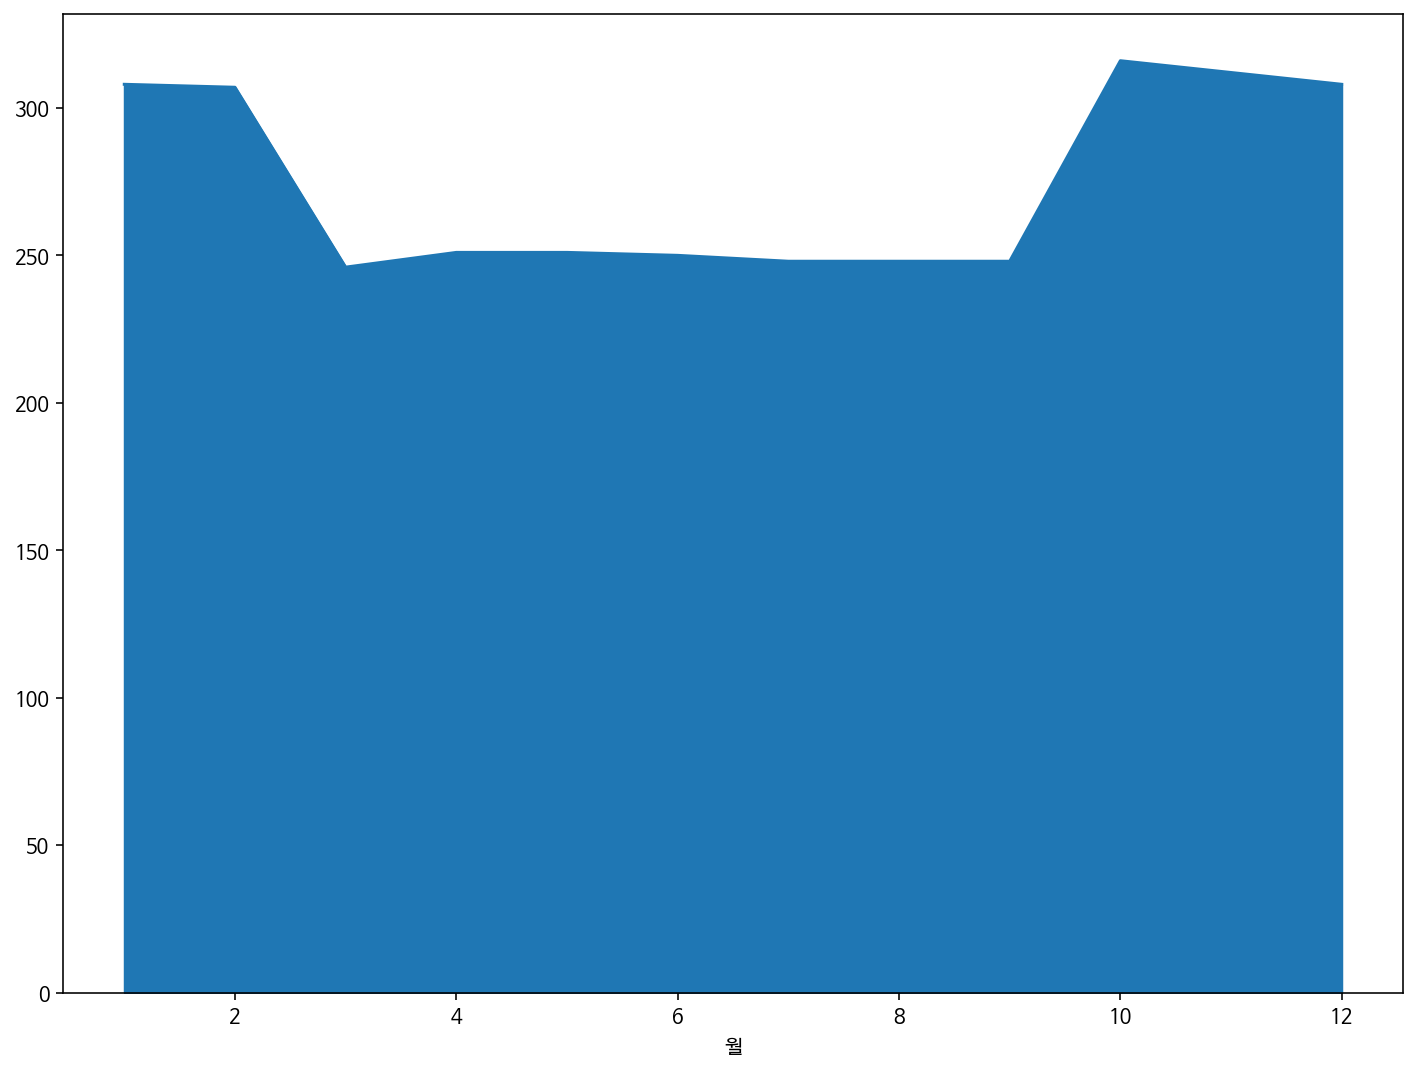

In [ ]:
df.groupby('월')['분양가'].count().plot(kind='area')

## pie plot (파이 그래프)

pie는 대표적으로 데이터의 점유율을 보여줄 때 유용합니다.

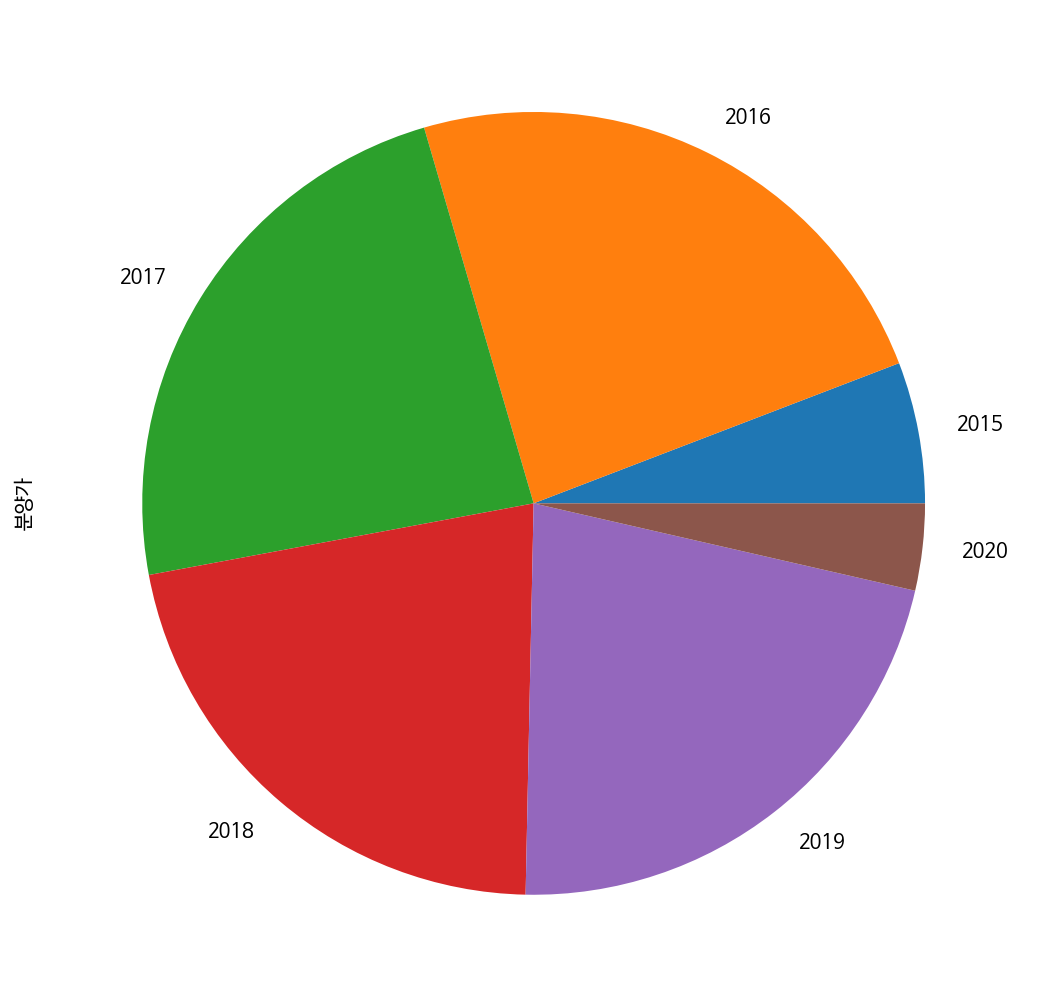

In [ ]:
df.groupby('연도')['분양가'].count().plot(kind = 'pie')


## scatter plot (산점도 그래프)

* 점으로 데이터를 표기해 줍니다
* x, y 값을 넣어주어야합니다 (hexbin과 유사)
* x축과 y축을 지정해주면 그에 맞는 데이터 분포도를 볼 수 있습니다.
* 역시 numeric 한 column 만 지정할 수 있습니다

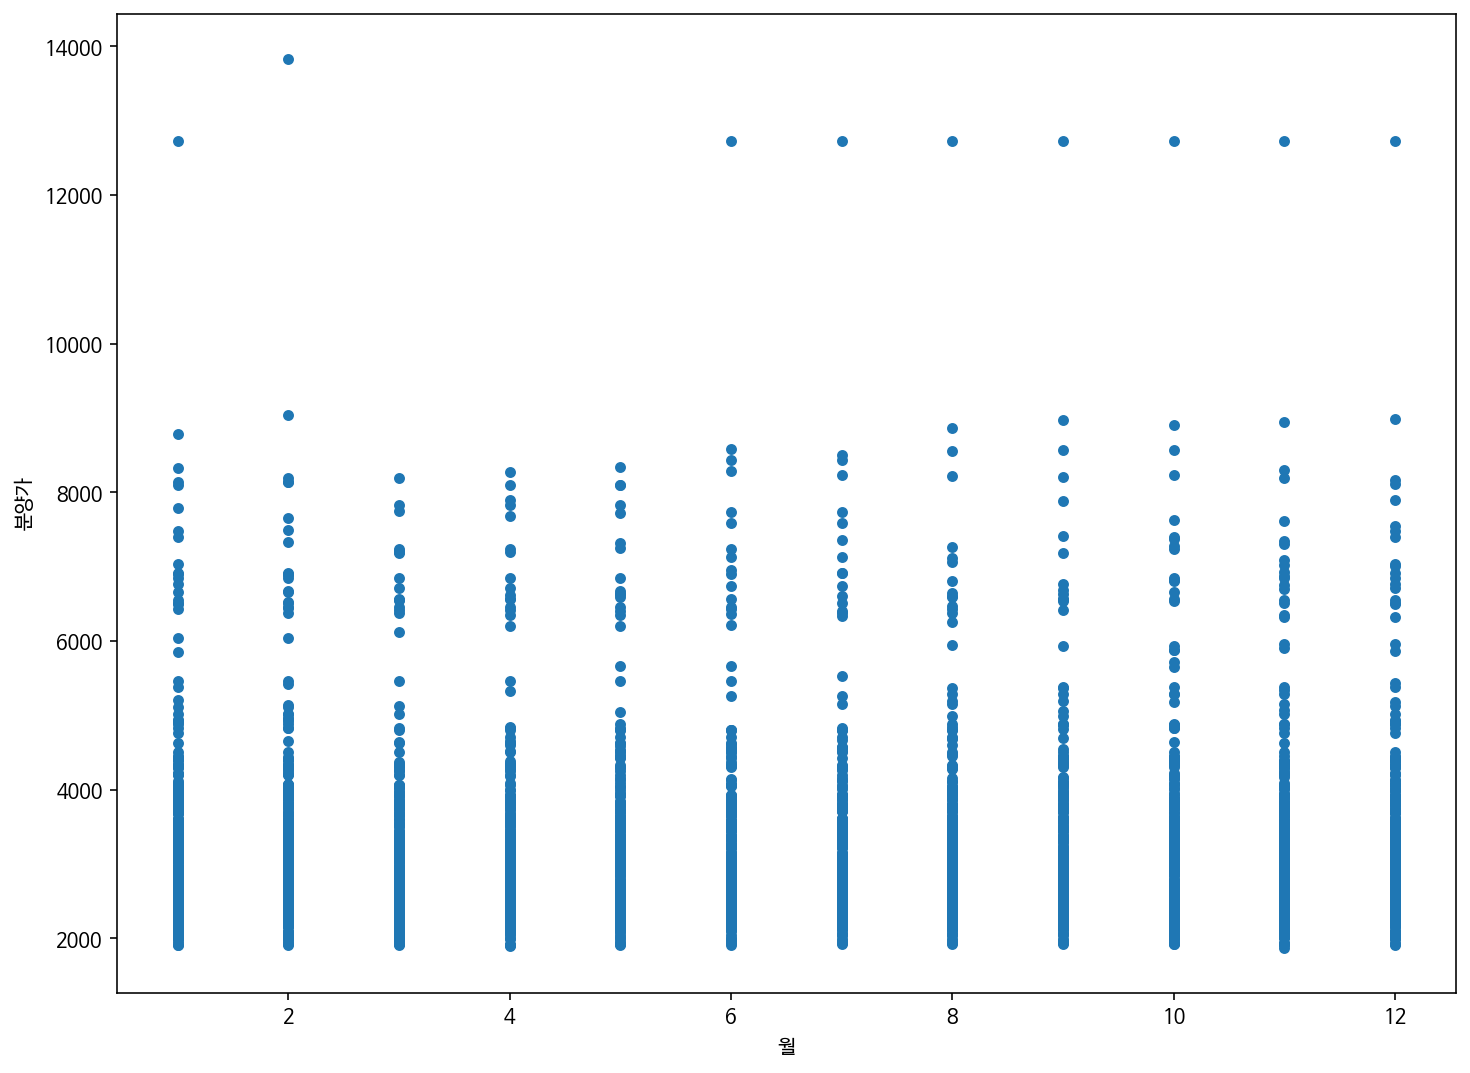

In [ ]:
df.plot(x ='월', y = '분양가', kind = 'scatter')